In [1]:
#using nfl-env conda python 3.10.4 environment 
import pandas as pd
import numpy as np
import nflfastpy as nfl 
from matplotlib import pyplot as plt
from matplotlib import style
import requests
from io import BytesIO

pd.options.display.max_rows = 100
pd.options.display.max_columns = 1000
style.use("ggplot")
style.use("seaborn-notebook")
style.use("fivethirtyeight")

In [4]:
df_pbp = pd.read_csv('C:\\NFL_Data\\NFL_PBP2.csv', low_memory=False)

In [102]:
#What do we think determines run/pass split in the nfl in general, what can we use as a starting point

# 1.) Down and Distance
# 2.) Score Differential/Time Remaining
# 3.) Personel and Opponent
# 4.) Weather Conditions
# 5.) Prior plays

cols = ['game_id', 'play_id', 'play_type', 'down', 'ydstogo', 'score_differential', 'game_seconds_remaining', 'posteam', 'defteam', 'passer_player_name', 'passer_player_id', 'rusher_player_name', 'rusher_player_id', ]
df = (
    df_pbp
    [cols].
    assign(pass_yn = np.where(df_pbp['play_type'] == 'pass', 1, 0)).
    query("play_type in ('run', 'pass')")
    )

df.head()



,game_id,play_id,play_type,down,ydstogo,score_differential,game_seconds_remaining,posteam,defteam,passer_player_name,passer_player_id,rusher_player_name,rusher_player_id,pass_yn
2,2017_01_ARI_DET,73,pass,1.0,10,0.0,3594.0,ARI,DET,C.Palmer,00-0021429,NaN,NaN,1
3,2017_01_ARI_DET,97,run,2.0,6,0.0,3556.0,ARI,DET,NaN,NaN,Da.Johnson,00-0032187,0
4,2017_01_ARI_DET,118,pass,3.0,4,0.0,3514.0,ARI,DET,C.Palmer,00-0021429,NaN,NaN,1
5,2017_01_ARI_DET,153,run,1.0,10,0.0,3471.0,ARI,DET,NaN,NaN,Da.Johnson,00-0032187,0
6,2017_01_ARI_DET,174,pass,2.0,12,0.0,3433.0,ARI,DET,C.Palmer,00-0021429,NaN,NaN,1


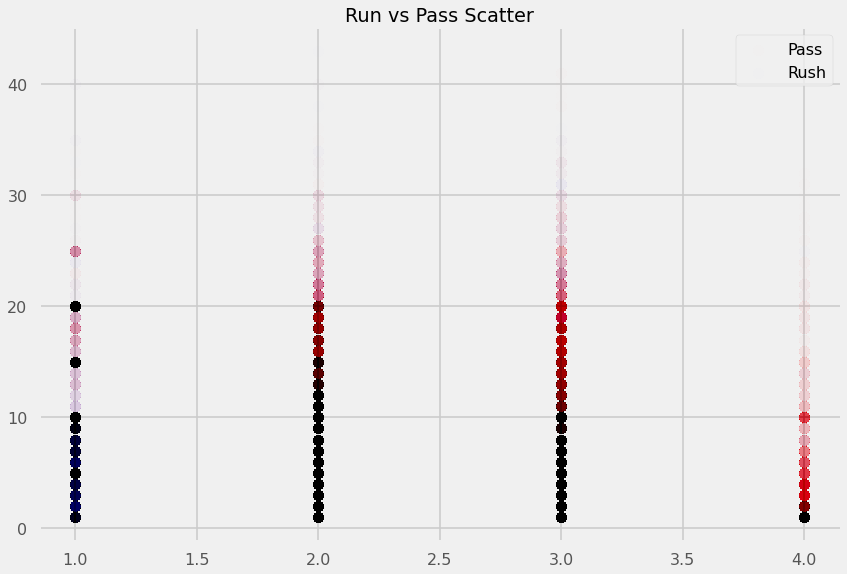

In [113]:
from matplotlib import pyplot as plt, style 
style.use('ggplot')
style.use('fivethirtyeight')
style.use('seaborn-poster')

pass_df = df.loc[df['pass_yn']==1, :]
rush_df = df.loc[~(df['pass_yn']==1), :]


plt.scatter(pass_df['down'], pass_df['ydstogo'], alpha = .0025, color = 'red', label = 'Pass')
plt.scatter(rush_df['down'], rush_df['ydstogo'], alpha = .0025, color = 'blue', label = 'Rush')
plt.legend()
plt.title("Run vs Pass Scatter")
plt.show()

In [57]:
pass_cols = ['play_type', 'beginning_seconds_remaining', 'ending_seconds_remaining', 'passer_player_id',
             'passer_player_name', 'down', 'goal_to_go',
            ]
df_pbp_pass = (
            df_pbp.
            sort_values(by='play_id').
            assign(ending_seconds_remaining = df_pbp.groupby('game_id')['game_seconds_remaining'].shift(-1)).
            rename(columns = {'game_seconds_remaining':'begining_seconds_remaining'}).
            query("play_type == 'pass'")
            [pass_cols ]
            )
            

# df_pbp_run = (
#             df_pbp.
#             sort_values(by='play_id').
#             assign(ending_seconds_remaining = df_pbp.groupby('game_id')['game_seconds_remaining'].shift(1)).
#             query("play_type == 'run'")
#             )

df_pbp_pass.head()

,play_type,beginning_seconds_remaining,ending_seconds_remaining,passer_player_id,passer_player_name,down,goal_to_go
138585,pass,3600.0,3562.0,00-0035710,D.Jones,1.0,0
34023,pass,3600.0,3595.0,00-0031345,J.Garoppolo,1.0,0
25963,pass,3600.0,3559.0,00-0022924,B.Roethlisberger,1.0,0
80933,pass,3600.0,3568.0,00-0033104,C.Kessler,1.0,0
119191,pass,3600.0,3596.0,00-0034869,S.Darnold,1.0,0


In [42]:
#project seconds run off 
#point differential
#goal_to_go
#touchdown
#ydstogo
#df_pbp_pass.head()


#Predict Clock Stoppage
#

In [71]:
pd.options.display.max_rows = 1000

(    
df_pbp
[['game_id', 'play_id', 'game_seconds_remaining', 'desc']].
query("game_id == '2017_01_ARI_DET'").
sort_values(by='play_id').
to_csv('game_time_test.csv', index=False)
)

In [119]:
num = 1 
denom = 1+10**((1700-1800)/400)

In [120]:
num/denom

0.6400649998028851